### Importing Modules and Data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models,fitting
import os
import warnings

os.chdir('/home/hrv/Downloads')
warnings.filterwarnings('ignore')
data = np.loadtxt('absorption.dat')
x = data[:,0]
y = data[:,1]

### Fitting using **Gaussian1D** model:

Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Gaussian1D(amplitude=-0.92646532, mean=656.2431014, stddev=1.19044536)>

    [1]: <Const1D(amplitude=0.93650496)>
Parameters:
       amplitude_0           mean_0           stddev_0         amplitude_1    
    ------------------ ----------------- ------------------ ------------------
    -0.926465318057012 656.2431014047378 1.1904453607565109 0.9365049601139186


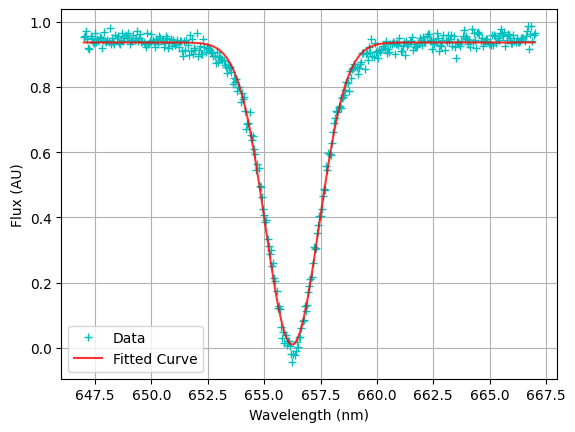

In [3]:
my_model1 = models.Gaussian1D(amplitude = -1, mean = 656, stddev = 1) + models.Const1D(amplitude = 1)
fit_method = fitting.LevMarLSQFitter()
my_bestfit1 = fit_method(my_model1,x,y,)

print(my_bestfit1)

plt.figure()
plt.plot(x,y,'c+',label='Data')
plt.plot(x,my_bestfit1(x),'r-',label='Fitted Curve',alpha=0.8)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Flux (AU)')
plt.grid(True,which='both')
plt.legend(loc='best')
plt.show()


### Fitting using **Voigt1D** model:

Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Voigt1D(x_0=656.24371948, amplitude_L=-2.06112867, fwhm_L=1.00059489, fwhm_G=2.14123018)>

    [1]: <Const1D(amplitude=0.95499104)>
Parameters:
          x_0_0         amplitude_L_0    ...      fwhm_G_0         amplitude_1    
    ----------------- ------------------ ... ------------------ ------------------
    656.2437194848126 -2.061128666790886 ... 2.1412301829537133 0.9549910350453772


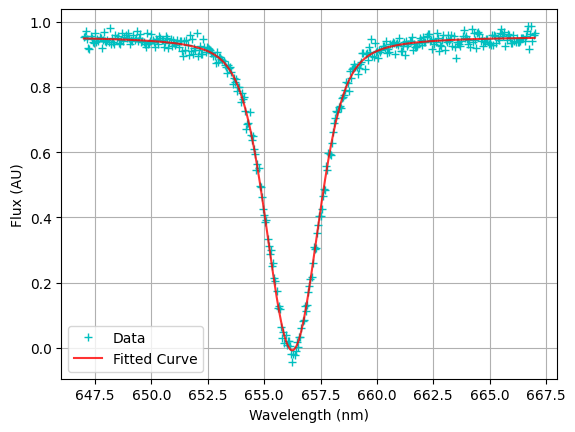

In [8]:
my_model2 = models.Voigt1D(x_0 = 656, amplitude_L = -1, fwhm_L = 1, fwhm_G = 1) + models.Const1D(amplitude = 1)
fit_method = fitting.LevMarLSQFitter()
my_bestfit2 = fit_method(my_model2,x,y,)

print(my_bestfit2)

plt.figure()
plt.plot(x,y,'c+',label='Data')
plt.plot(x,my_bestfit2(x),'r-',label='Fitted Curve',alpha=0.8)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Flux (AU)')
plt.grid(True,which='both')
plt.legend(loc='best')
plt.show()

### Fitting using **Lorentz1D** model:

Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Lorentz1D(amplitude=-1.04214977, x_0=656.24654413, fwhm=2.49728462)>

    [1]: <Const1D(amplitude=0.98634103)>
Parameters:
        amplitude_0           x_0_0             fwhm_0          amplitude_1    
    ------------------- ----------------- ------------------ ------------------
    -1.0421497656427168 656.2465441345435 2.4972846213091917 0.9863410325967857


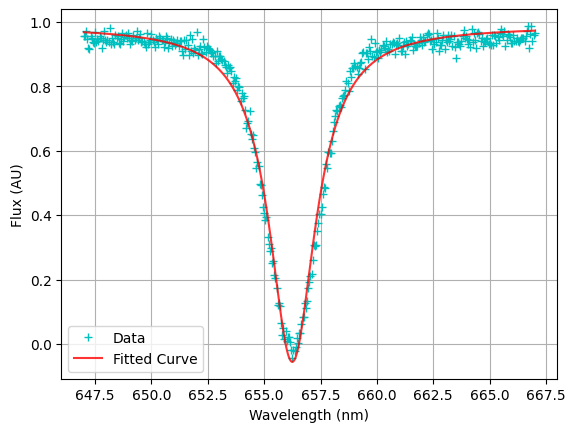

In [42]:
my_model3 = models.Lorentz1D(amplitude = -1, x_0 = 656, fwhm = 1) + models.Const1D(amplitude = 1)
fit_method = fitting.LevMarLSQFitter()
my_bestfit3 = fit_method(my_model3,x,y,)

print(my_bestfit3)

plt.figure()
plt.plot(x,y,'c+',label='Data')
plt.plot(x,my_bestfit3(x),'r-',label='Fitted Curve',alpha=0.8)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Flux (AU)')
plt.grid(True,which='both')
plt.legend(loc='best')
plt.show()

Since the error of flux measurement is not given in the quation, it is not possible to the reduced ${\chi}^2$ value. However, if we compare the three fits visually, we can see that the fit obtained by using the **Voigt1D** model is the most appropriate one.